<a href="https://colab.research.google.com/github/Dabii19/CFE-IA-E11/blob/main/AnalisisSesgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#Se importan librerías

!pip install gensim

import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [18]:
# Se importan pandas y se muestran los primeros 5 datos
import pandas as pd

df = pd.read_csv("df_total.csv")

df.head(5)

,url,news,Type
0,https://www.larepublica.co/redirect/post/3201905,Durante el foro La banca articulador empresari...,Otra
1,https://www.larepublica.co/redirect/post/3210288,El regulador de valores de China dijo el domin...,Regulaciones
2,https://www.larepublica.co/redirect/post/3240676,En una industria históricamente masculina como...,Alianzas
3,https://www.larepublica.co/redirect/post/3342889,Con el dato de marzo el IPC interanual encaden...,Macroeconomia
4,https://www.larepublica.co/redirect/post/3427208,Ayer en Cartagena se dio inicio a la versión n...,Otra


In [19]:
# Creamos el corpus
corpus = df['news']

In [20]:
# Colocamos en minúsculas
sentences = [frase.lower().split() for frase in corpus]

print(sentences[0])

['durante', 'el', 'foro', 'la', 'banca', 'articulador', 'empresarial', 'para', 'el', 'desarrollo', 'sostenible', 'el', 'director', 'de', 'sostenibilidad', 'y', 'clientes', 'globales', 'de', 'bbva', 'en', 'colombia', 'andrés', 'garcía', 'aseguró', 'que', 'es', 'importante', 'entender', 'que', 'la', 'sostenibilidad', 'no', 'la', 'podemos', 'asociar', 'a', 'mayores', 'costos.', 'yo', 'creo', 'que', 'el', 'no', 'tener', 'un', 'concepto', 'de', 'negocio', 'sostenible', 'puede', 'tener', 'un', 'mayor', 'impacto', 'de', 'lo', 'que', 'imaginamos.para', 'garcía', 'el', 'reto', 'más', 'importante', 'es', 'no', 'cambiar', 'prioridades', 'ni', 'que', 'compitan', 'entre', 'sí', 'necesariamente.', 'en', 'muchos', 'de', 'los', 'casos', 'se', 'debe', 'tratar', 'de', 'mantener', 'la', 'prioridad', 'en', 'cuanto', 'a', 'la', 'ambición', 'de', 'negocios', 'más', 'sostenibles', 'un', 'reto', 'enorme', 'por', 'la', 'coyuntura.', 'la', 'sostenibilidad', 'nos', 'abre', 'oportunidades', 'a', 'mejores', 'fuent

In [21]:
model = Word2Vec(
    sentences,
    vector_size = 50,
    window = 3,
    min_count = 1,
    workers = 4,
    sg = 1
)

print(model.wv["empresarial"])
print(len(model.wv["empresarial"]))

[ 0.38514018 -0.07528377 -0.07759284  0.01252486 -0.3754183   0.1847477
 -0.11044277  0.3504504  -0.82429075 -0.51641124  0.29083967 -0.48126665
  0.26905718  0.65950674  0.33342656  0.42890304  0.73641723  0.53221536
 -1.0431037  -0.45443186  0.6837041   0.27425238  0.8631587  -0.46857125
  0.16359362 -0.06367084 -0.20707788  0.6189709   0.11170936 -0.06941486
  0.14284335 -0.75154805  0.3880255  -0.390984   -0.29599094 -0.33276343
  0.7787916  -0.22325866  0.1836267  -0.32201478  0.24964882  0.30314004
 -0.48073795 -0.16899358  0.52898777 -0.11691781  0.12041809 -0.33950225
 -0.07605693  0.57052827]
50


In [24]:
palabras_a_graficar = [
    "feminista",
    "machista",
    "migrante",
    "extranjero",
    "policía",
    "criminal",
    "rico",
    "pobre",
    "víctima",
    "culpable"
]


palabras_validas = [p for p in palabras_a_graficar if p in model.wv]
print("Palabras que se van a graficar:", palabras_validas)

Palabras que se van a graficar: ['migrante', 'extranjero', 'policía', 'rico', 'pobre', 'víctima', 'culpable']


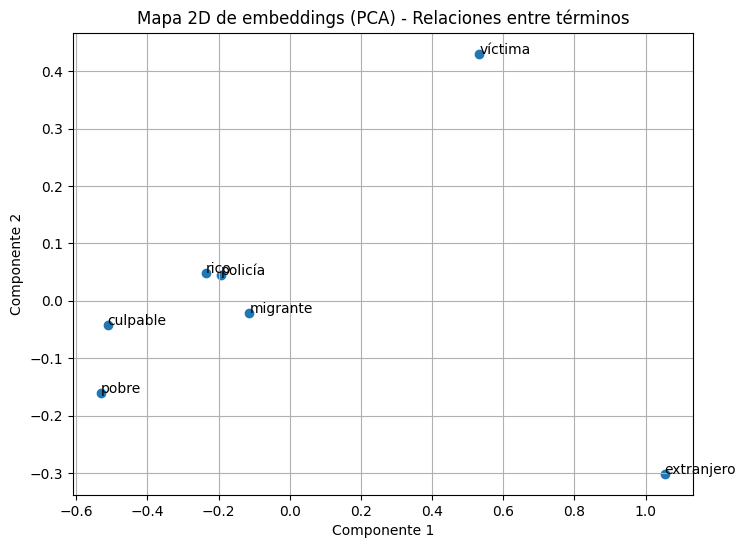

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

vectores = [model.wv[p] for p in palabras_validas]

pca = PCA(n_components=2)
coords_2d = pca.fit_transform(vectores)

plt.figure(figsize=(8,6))

x_vals = coords_2d[:, 0]
y_vals = coords_2d[:, 1]

plt.scatter(x_vals, y_vals)

for i, palabra in enumerate(palabras_validas):
    plt.annotate(palabra, (x_vals[i], y_vals[i]))

plt.title("Mapa 2D de embeddings (PCA) - Relaciones entre términos")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.grid(True)
plt.show()